**FOREST FIRE DETECTION USING MACHINE LEARNING**
-----

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split


pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) #Limiting 4 decimal
plt.rcParams["figure.figsize"] = [9,5]
plt.style.use('ggplot')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv(r'/content/Forest Fire Detection.csv')
print(df, "\n")
data_df = df #saving pandas dataframe to new dataframe

In [ ]:
target = 'area' 

In [ ]:
data_df.shape

(517, 13)

In [ ]:
dft = data_df.drop(columns=target)
cate_columns = dft.select_dtypes(include='object').columns.tolist()
nume_columns = dft.select_dtypes(exclude='object').columns.tolist()

In [ ]:
print('Categorical columns: ',cate_columns) #getting the catagorical and numerical columns 
print('Numerical columns: ',nume_columns)

Categorical columns:  ['month', 'day']
Numerical columns:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


In [ ]:
outlier_columns = ['area','FFMC','ISI','rain'] #oulier by names 

In [ ]:
np.log1p(data_df[outlier_columns]).skew() #converting the values to natural log of its value for converting outlier into normal values 

area     1.2178
FFMC   -11.6754
ISI     -0.9372
rain    14.1730
dtype: float64

In [ ]:
np.log1p(data_df[outlier_columns]).kurtosis()

area     0.9457
FFMC   185.4824
ISI      2.5846
rain   234.2400
dtype: float64

In [ ]:
mask = data_df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [ ]:
data_df = data_df[mask.values]
data_df.shape

(510, 13)

In [ ]:
# Since most of the values in rain are 0.0, we can convert it as a categorical column
data_df['rain'] = data_df['rain'].apply(lambda x: int(x > 0.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
outlier_columns.remove('rain')
data_df[outlier_columns] = np.log1p(data_df[outlier_columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_df[outlier_columns].skew()

area    1.2085
FFMC   -1.8040
ISI    -0.4344
dtype: float64

In [ ]:
data_df[outlier_columns].kurtosis() 

area   0.9234
FFMC   4.8667
ISI    1.1226
dtype: float64

In [ ]:
data_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,4.6804,4.2941,4.5226,111.8376,550.4704,2.2285,18.9516,44.0294,4.0173,0.0157,1.1214
std,2.3205,1.2346,0.0350,63.8537,246.6307,0.4288,5.7899,15.9683,1.7888,0.1244,1.4014
min,1.0000,2.0000,4.3320,3.0000,7.9000,0.7419,2.2000,15.0000,0.4000,0.0000,0.0000
25%,3.0000,4.0000,4.5142,73.2500,442.3000,2.0412,15.6250,32.2500,2.7000,0.0000,0.0000
50%,4.0000,4.0000,4.5288,108.4000,664.2000,2.2407,19.3000,41.5000,4.0000,0.0000,0.4572
75%,7.0000,5.0000,4.5422,142.4000,714.2000,2.4849,22.8000,53.0000,4.9000,0.0000,2.0252
max,9.0000,9.0000,4.5768,291.3000,860.6000,4.0448,33.3000,99.0000,9.4000,1.0000,6.9956


In [ ]:
data_sel = data_df.copy()

In [ ]:
le = LabelEncoder() #encoding the catagorical columns
  
data_sel['day']= le.fit_transform(data_sel['day']) 
data_sel['month']= le.fit_transform(data_sel['month']) 

In [ ]:
X, y = data_sel.iloc[:,:-1],data_sel.iloc[:,-1] #puting area in y rest in X

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn import metrics


from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
data_sel
data_sel["area"] = np.where(data_sel["area"] <= 3, 0, 1) 
      #classifing the area on the basis of its value to either 1 or 0 


data_sel = data_sel.rename(columns={'area': 'label'})
data_sel

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,7,0,4.4682,26.2000,94.3000,1.8083,8.2000,51,6.7000,0,0
1,7,4,10,5,4.5174,35.4000,669.1000,2.0412,18.0000,33,0.9000,0,0
2,7,4,10,2,4.5174,43.7000,686.9000,2.0412,14.6000,33,1.3000,0,0
3,8,6,7,0,4.5294,33.3000,77.5000,2.3026,8.3000,97,4.0000,1,0
4,8,6,7,3,4.5031,51.3000,102.2000,2.3609,11.4000,99,1.8000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,4.4140,56.7000,665.6000,1.0647,27.8000,32,2.7000,0,0
513,2,4,1,3,4.4140,56.7000,665.6000,1.0647,21.9000,71,5.8000,0,1
514,7,4,1,3,4.4140,56.7000,665.6000,1.0647,21.2000,70,6.7000,0,0
515,1,4,1,2,4.5581,146.0000,614.7000,2.5096,25.6000,42,4.0000,0,0


In [ ]:
X

#### Logistic Regression Classification

In [ ]:
# Logistic Regression Classification
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
# X.drop(['label'], axis = 1)
X = data_sel
X = X.drop(['label'], axis = 1)

y = data_sel['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn import metrics
logmodel.score(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("======================================================")

print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("======================================================")

from sklearn.metrics import classification_report,confusion_matrix

#print("CONFUSION MATRIX:",confusion_matrix(y_test,predictions))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test,predictions)}")
print("======================================================")
print(classification_report(y_test,predictions))

Accuracy: 0.8758169934640523
Precision: 0.0
Recall: 0.0
CONFUSION MATRIX:
[[134   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       134
           1       0.00      0.00      0.00        19

    accuracy                           0.88       153
   macro avg       0.44      0.50      0.47       153
weighted avg       0.77      0.88      0.82       153



In [ ]:
classes={0:'SAFE',1:'ON FIRE'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 1]]
y_predict=logmodel.predict(x_new)
print(classes[y_predict[0]])

SAFE


In [ ]:
df = data_df

In [ ]:
df.tail(45)

In [ ]:
X.tail(18)

#### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = data_sel.drop('label', axis=1)
y = data_sel['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=92)

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

# make predictions
predicted = d_tree.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print("======================================================")
print(metrics.confusion_matrix(y_test, predicted))
print("======================================================")
logi_score = metrics.accuracy_score(y_test, predicted)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))
print("======================================================")
classes={0:'SAFE',1:'ON FIRE'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 1]]
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       137
           1       0.17      0.25      0.20        16

    accuracy                           0.79       153
   macro avg       0.54      0.55      0.54       153
weighted avg       0.83      0.79      0.81       153

[[117  20]
 [ 12   4]]
Accuracy: 0.7908496732026143
Precision: 0.16666666666666666
Recall: 0.25
ON FIRE


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=1024)

In [ ]:
tree_score = grid_search.best_score_
tree_score

0.8767605633802816

In [ ]:
data_sel.shape

(510, 13)

In [ ]:
y.shape

(510,)

In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define dataset
daat_sel, y = make_classification(n_samples=510, n_features=13, n_informative=6, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(': %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

: 0.533 (0.069)


###Random Forest Classifier

In [ ]:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

model.fit(X, y)

x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
yhat = model.predict(x_new)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [ ]:
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=model.predict(x_new)
print(classes[y_predict[0]])

SAFE


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
forest_score = grid_search.best_score_
forest_score

0.876750700280112

In [ ]:
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 1]]
yhat = grid_search.predict(x_new)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


###SVM 

In [ ]:
from sklearn import svm
model_svc = svm.SVC(kernel="linear")
model_svc
from sklearn.svm import SVC 

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svm_score = grid.best_score_


In [ ]:
classes={0:'SAFE',1:'ON FIRE'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 1]]
y_predict=grid_search.predict(x_new)
print(classes[y_predict[0]])

SAFE


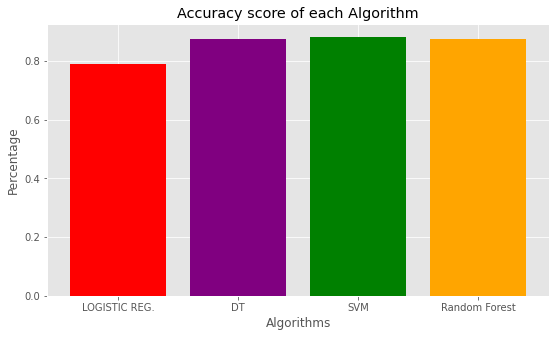

<Figure size 800x640 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = ['LOGISTIC REG.','DT','SVM','Random Forest']
h = [logi_score, tree_score, svm_score, forest_score]
c = ['red','purple','green','orange']
plt.bar(x, height = h,color = c)
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Accuracy score of each Algorithm")
figure(figsize=(10,8), dpi=80)
plt.show()